<a href="https://colab.research.google.com/github/R-profit/Pro_Riesgo_Finanzas/blob/main/Analisis_tecnico_avanzado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=ed17f29553d66db3449fde4ee25398933692e0a48e29c6ec609693132e5ade19
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [ ]:
#Funciones numericas adicionales
import numpy as np

#lectura de datos y Manejo data-sects
import pandas as pd


#Api Datos
import yfinance as yfin

#graficos
import matplotlib.pyplot as plt

#analisis tecnico
import ta



In [ ]:
#descargar datos de 1año de la accion Bitcoin

df = yfin.download('BTC-USD', start='2020-07-01', end='2021-07-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
...,...,...,...,...,...,...
2021-06-26,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,38585385521
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752


In [ ]:
#suma 5 dias
df['SMA_short'] =df['Adj Close'].rolling(window=5).mean()
#suma 20 dias
df['SMA_Long'] =df['Adj Close'].rolling(window=20).mean()
df

,Open,High,Low,Close,Adj Close,Volume,SMA_short,SMA_Long
Date,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN
...,...,...,...,...,...,...,...,...
2021-06-26,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,38585385521,32943.036328,35679.221680
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711


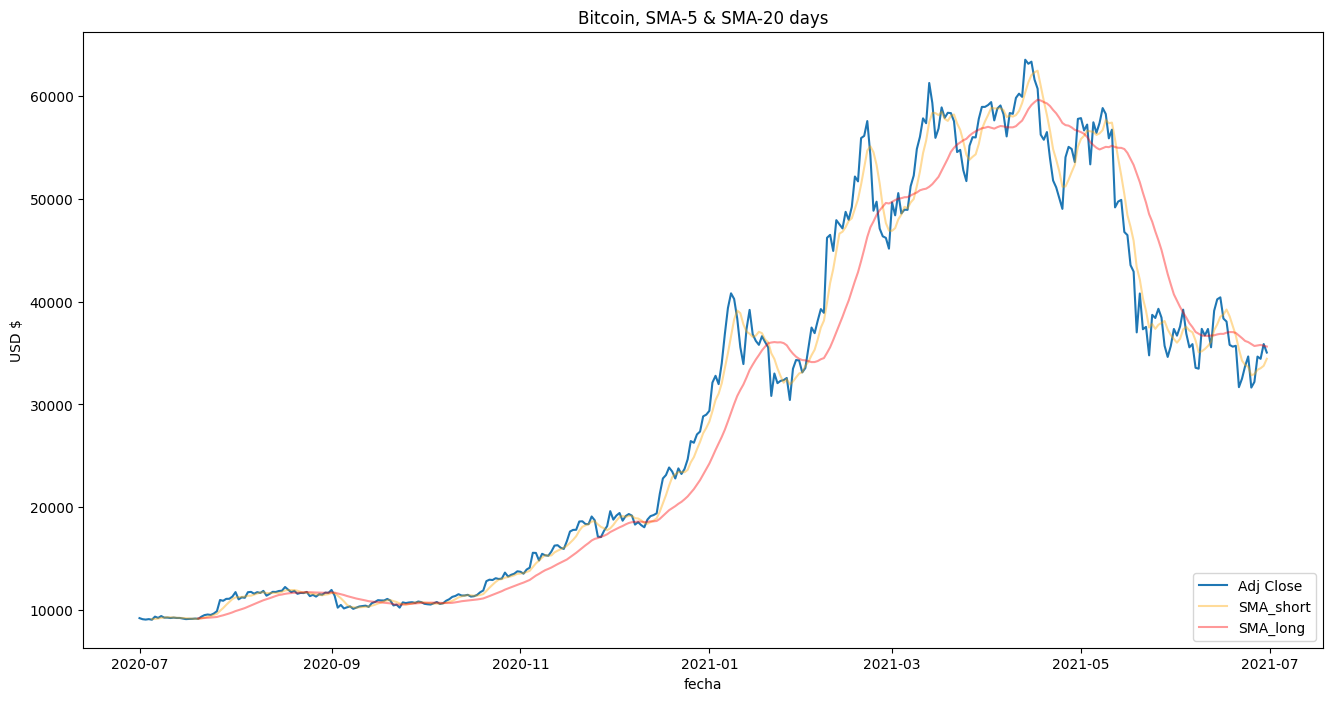

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin, SMA-5 & SMA-20 days')
plt.plot(df['Adj Close'])
plt.plot(df['SMA_short'], color='orange',alpha=0.4)
plt.plot(df['SMA_Long'], color='red',alpha=0.4)
plt.xlabel('fecha')
plt.ylabel('USD $')
plt.legend(['Adj Close','SMA_short','SMA_long'],loc ='lower right')
plt.show()



In [ ]:
#EMA 5 dias
df['EMA_short'] = df['Adj Close'].ewm(span=5, adjust=False).mean()
#EMA 20 dias
df['EMA_long'] = df['Adj Close'].ewm(span=20, adjust=False).mean()
df


,Open,High,Low,Close,Adj Close,Volume,SMA_short,SMA_Long,EMA_short,EMA_long
Date,,,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN,9228.325195,9228.325195
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN,9193.353516,9218.333287
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN,9158.003581,9205.854280
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN,9149.498481,9198.867042
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN,9124.313115,9186.969455
...,...,...,...,...,...,...,...,...,...,...
2021-06-26,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,38585385521,32943.036328,35679.221680,32962.413029,35385.003934
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555,33524.823530,35314.969706
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711,33827.994332,35231.099823


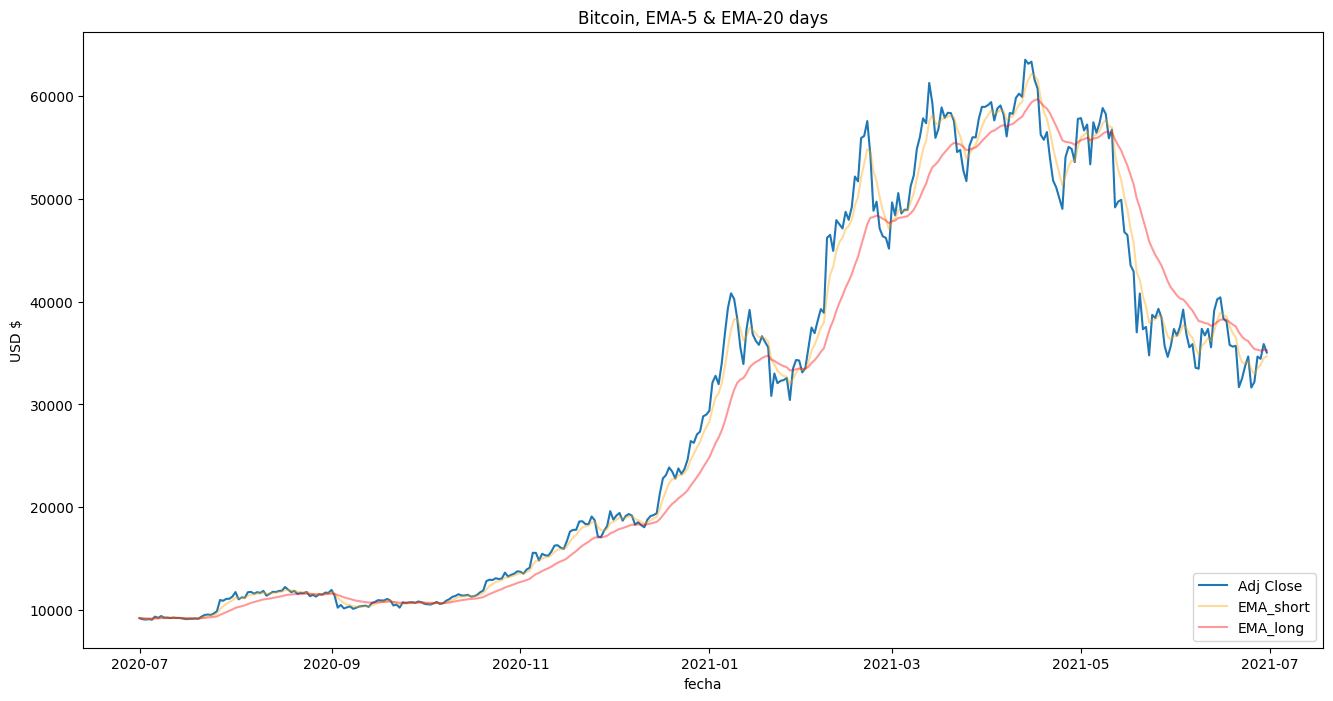

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin, EMA-5 & EMA-20 days')
plt.plot(df['Adj Close'])
plt.plot(df['EMA_short'], color='orange',alpha=0.4)
plt.plot(df['EMA_long'], color='red',alpha=0.4)
plt.xlabel('fecha')
plt.ylabel('USD $')
plt.legend(['Adj Close','EMA_short','EMA_long'],loc ='lower right')
plt.show()

In [ ]:
#bandas de bollinger
bb = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2)

df['BOL_M'] = bb.bollinger_mavg()
df['BOL_U'] = bb.bollinger_hband()
df['BOL_D'] = bb.bollinger_lband()

df



,Open,High,Low,Close,Adj Close,Volume,SMA_short,SMA_Long,EMA_short,EMA_long,BOL_M,BOL_U,BOL_D
Date,,,,,,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN,9228.325195,9228.325195,NaN,NaN,NaN
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN,9193.353516,9218.333287,NaN,NaN,NaN
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN,9158.003581,9205.854280,NaN,NaN,NaN
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN,9149.498481,9198.867042,NaN,NaN,NaN
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN,9124.313115,9186.969455,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,38585385521,32943.036328,35679.221680,32962.413029,35385.003934,35679.221680,41023.920892,30334.522467
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555,33524.823530,35314.969706,35733.668555,41012.715513,30454.621597
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711,33827.994332,35231.099823,35781.753711,40994.649699,30568.857723


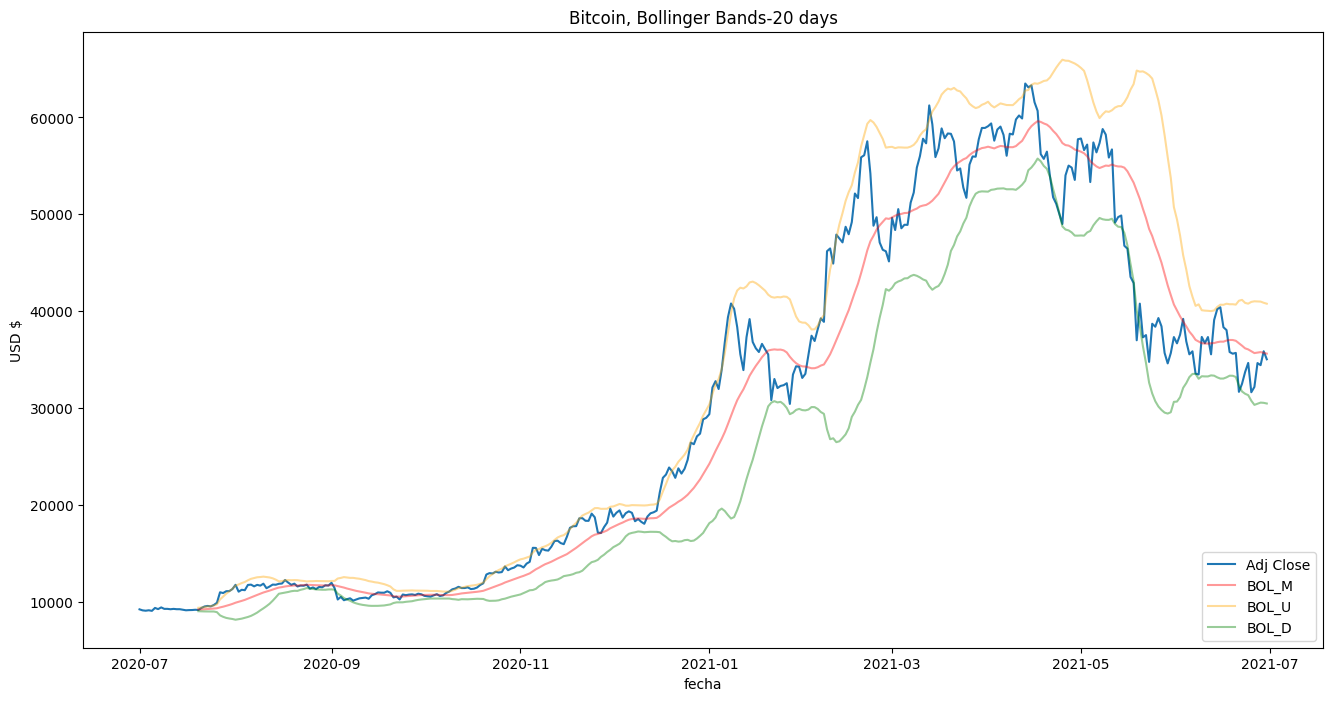

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin, Bollinger Bands-20 days')
plt.plot(df['Adj Close'])
plt.plot(df['BOL_M'], color='red',alpha=0.4)
plt.plot(df['BOL_U'], color='orange',alpha=0.4)
plt.plot(df['BOL_D'], color='green',alpha=0.4)
plt.xlabel('fecha')
plt.ylabel('USD $')
plt.legend(['Adj Close','BOL_M','BOL_U','BOL_D'],loc ='lower right')
plt.show()

In [ ]:
#Media Movil de Convergencia-Divergencia(MA)
df['MACD'] = ta.trend.MACD(close=df['Close'],window_fast=12, window_slow=26).macd()
df

,Open,High,Low,Close,Adj Close,Volume,SMA_short,SMA_Long,EMA_short,EMA_long,BOL_M,BOL_U,BOL_D,MACD
Date,,,,,,,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN,9228.325195,9228.325195,NaN,NaN,NaN,NaN
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN,9193.353516,9218.333287,NaN,NaN,NaN,NaN
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN,9158.003581,9205.854280,NaN,NaN,NaN,NaN
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN,9149.498481,9198.867042,NaN,NaN,NaN,NaN
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN,9124.313115,9186.969455,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,38585385521,32943.036328,35679.221680,32962.413029,35385.003934,35679.221680,41023.920892,30334.522467,-1901.141713
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555,33524.823530,35314.969706,35733.668555,41012.715513,30454.621597,-1733.088279
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711,33827.994332,35231.099823,35781.753711,40994.649699,30568.857723,-1598.847804


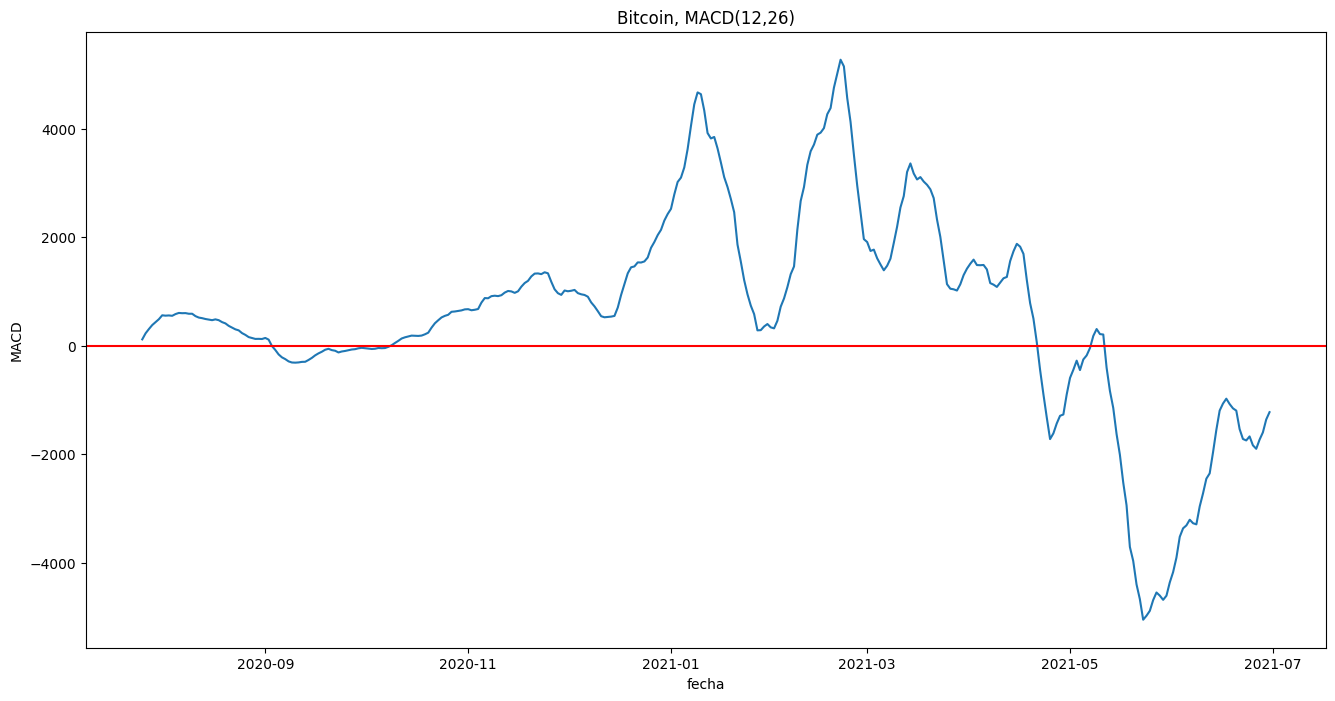

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin, MACD(12,26)')
plt.plot(df['MACD'])
plt.xlabel('fecha')
plt.ylabel('MACD')
plt.axhline(y=0,color='red')
plt.show()

In [ ]:
#retrocesos de foibonacci
max_p= df['Close'].max()
min_p= df['Close'].min()

dif_p = max_p - min_p

r_fibo = np.array([0.236,0.382,0.5, 0.618])
levels = max_p -dif_p*r_fibo

levels


array([50658.09157422, 42711.38243555, 36288.69970703, 29866.01697852])

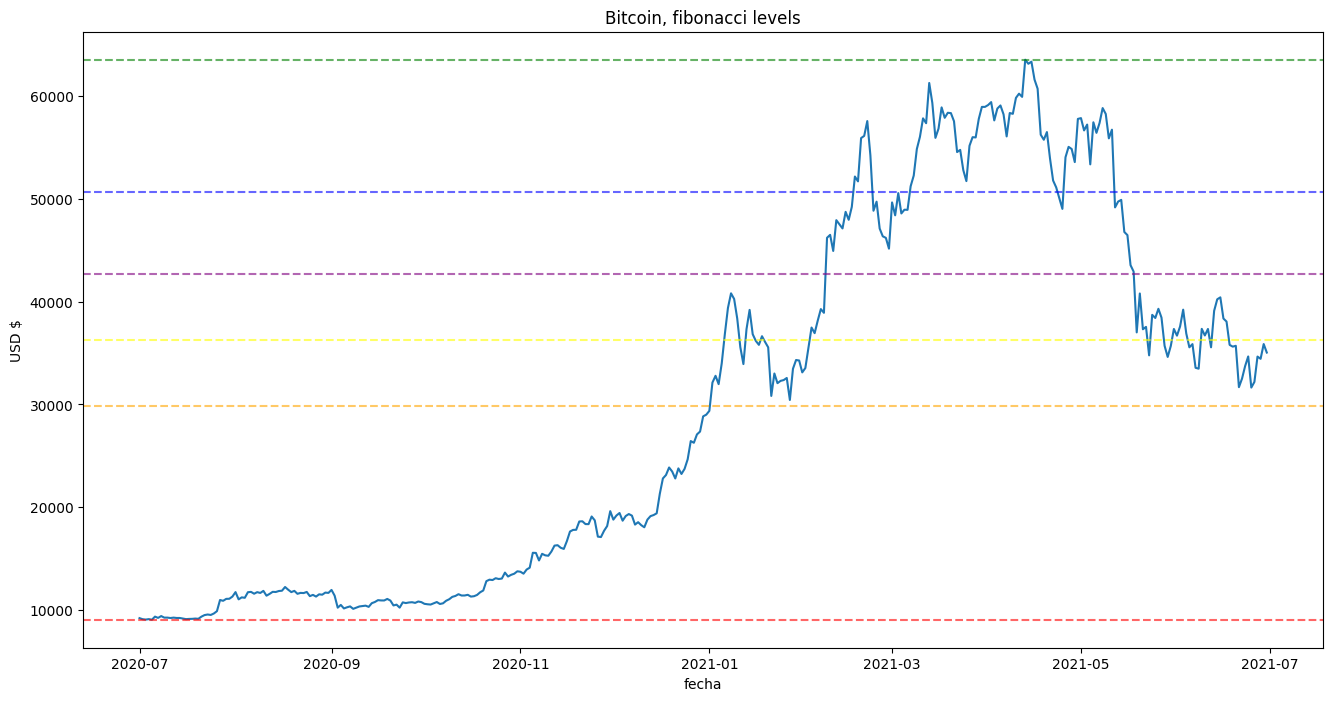

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin, fibonacci levels')
plt.plot(df['Close'])
plt.xlabel('fecha')
plt.ylabel('USD $')
plt.axhline( y = max_p, color='green', linestyle ='--', alpha = 0.6)
plt.axhline( y = levels[0], color='blue', linestyle ='--', alpha = 0.6)
plt.axhline( y = levels[1], color='purple', linestyle ='--', alpha = 0.6)
plt.axhline( y = levels[2], color='yellow', linestyle ='--', alpha = 0.6)
plt.axhline( y = levels[3], color='orange', linestyle ='--', alpha = 0.6)
plt.axhline( y = min_p, color='red', linestyle ='--', alpha = 0.6)










plt.show()